# INTRODUCTION


Background and objectives Diabetes mellitus is a major chronic disease that results in readmissions due to poor disease control. Here we established and compared machine learning (ML)-based readmission prediction methods to predict readmission risks of diabetic patients.

Methods The dataset analyzed in this study was acquired from the Health Facts Database, which includes over 100,000 records of diabetic patients from 1999 to 2008

# Importing all the required libraries

In [191]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

LOADING THE DATA

In [192]:
df=pd.read_csv(r'Z:\diabetic_data.csv')

In [193]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


There are  101766  rows in the dataset and  50 attributes.

#                                         FEATURES 

Encounter ID--- Unique identifier of an encounter

Patient number--- Unique identifier of a patient

Race Values:  Caucasian, Asian, African American, Hispanic, and other

Gender Values: male, female, and unknown/invalid

Age Grouped in  10-year intervals: 0, 10), 10, 20), …, 90, 100)

Weight Weight in pounds

Admission type Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

Discharge disposition Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

Admission source Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

Time in hospital Integer number of days between admission and discharge

Payer code Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

Medical specialty Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

Number of lab procedures Number of lab tests performed during the encounter

Number of procedures Numeric Number of procedures (other than lab tests) performed during the encounter

Number of medications Number of distinct generic names administered during the encounter

Number of outpatient visits Number of outpatient visits of the patient in the year preceding the encounter

Number of emergency visits Number of emergency visits of the patient in the year preceding the encounter

Number of inpatient visits Number of inpatient visits of the patient in the year preceding the encounter

Diagnosis 1 The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

Diagnosis 2 Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

Diagnosis 3 Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

Number of diagnoses Number of diagnoses entered to the system 0%

Glucose serum test result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

A1c test result Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

Change of medications Indicates if there was a change in diabetic medications (either dosage or generic name). + + Values: “change” and “no change”

Diabetes medications Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”


24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed


Target Variable:

Readmitted Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmissionFeatures

check for total records,  nulls, and data types of each attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Loading mapping file

In [6]:
maps=pd.read_csv(r'Z:\IDs_mapping.csv')

In [7]:
maps

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center




The mapping file has descriptions about ['admission_type' 'discharge_disposition' 'admission_source']

In [8]:
pd.options.display.max_rows=70
maps.head(70)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


Preview the unique values from each column 

In [9]:
for col in df:
    print(col)
    print(df[col].unique())
    print('\n--------------------------------------\n')

encounter_id
[  2278392    149190     64410 ... 443854148 443857166 443867222]

--------------------------------------

patient_nbr
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]

--------------------------------------

race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

--------------------------------------

gender
['Female' 'Male' 'Unknown/Invalid']

--------------------------------------

age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

--------------------------------------

weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']

--------------------------------------

admission_type_id
[6 1 2 3 4 5 8 7]

--------------------------------------

discharge_disposition_id
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]

--------------------------------------

admission_source_id
[ 1  7  2  4  5  6 20  3 1

# Data Cleaning

Checking if there are any duplicate values 

In [10]:
df[df.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [11]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Change  '?' race to 'Unknown'

In [12]:
df.replace({'race':{'?':'Unknown'}},inplace=True)

drop rows with unknown gender

In [13]:
df = df[df.gender != 'Unknown/Invalid']

replacing the range of age group with its median value 

In [14]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [15]:
df=df.replace({'age':{'[0-10)':'5'}})
df=df.replace({'age':{'[10-20)':'15'}})
df=df.replace({'age':{'[20-30)':'25'}})
df=df.replace({'age':{'[30-40)':'35'}})
df=df.replace({'age':{'[40-50)':'45'}})
df=df.replace({'age':{'[50-60)':'55'}})
df=df.replace({'age':{'[60-70)':'65'}})
df=df.replace({'age':{'[70-80)':'75'}})
df=df.replace({'age':{'[80-90)':'85'}})
df=df.replace({'age':{'[90-100)':'95'}})

Text(0.5, 1.0, 'weight vs counts')

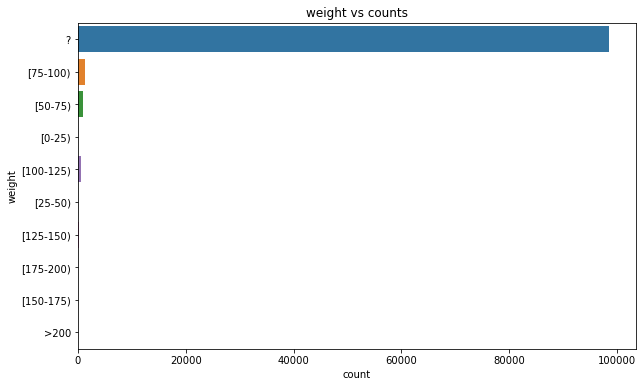

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y='weight',data=df)
plt.title('weight vs counts')

Drop attributes with high percentage of Nulls

weight column has 96% null values, payer_code has 52% null values, medical_speciality has 53% null values

In [17]:
df.drop(['weight', 'payer_code', 'medical_specialty'],axis =1, inplace=True)

delete attributes with same values

In [18]:
df.drop(['citoglipton','examide'], axis =1, inplace=True)

Removing all the data where the patient is Expired(dead) (at home or in hospital)

In [19]:
n3=df[(df['discharge_disposition_id']==11)]  
n4=df[(df['discharge_disposition_id']==19)]
n5=df[(df['discharge_disposition_id']==20)]
n6=df[(df['discharge_disposition_id']==21)]

In [20]:
n3

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
34,293118,3327282,Caucasian,Female,75,2,11,2,5,46,...,No,Down,No,No,No,No,No,Ch,Yes,NO
44,450210,80177094,Caucasian,Female,85,1,11,7,7,72,...,No,Steady,No,No,No,No,No,No,Yes,NO
64,712350,110537262,AfricanAmerican,Female,55,1,11,7,4,58,...,No,Down,No,No,No,No,No,Ch,Yes,NO
78,1069716,34806888,Caucasian,Female,55,2,11,4,2,35,...,No,Up,No,No,No,No,No,Ch,Yes,NO
100,1260312,38688588,Caucasian,Male,75,1,11,7,9,56,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101308,437832998,145903622,Other,Female,85,1,11,7,2,45,...,No,No,No,No,No,No,No,No,No,NO
101494,440179892,100366497,Asian,Male,85,2,11,7,9,54,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101507,440236928,99802224,Caucasian,Female,75,2,11,7,4,50,...,No,No,No,No,No,No,No,No,No,NO
101547,440822714,85528899,Caucasian,Female,85,1,11,7,3,54,...,No,No,No,No,No,No,No,No,No,NO


In [21]:
n4

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
45711,141209178,114468696,Asian,Male,85,1,19,7,1,56,...,No,No,No,No,No,No,No,No,No,NO
50667,151935108,97798419,Caucasian,Female,65,1,19,7,1,36,...,No,Up,No,No,No,No,No,Ch,Yes,NO
59576,167560608,94140558,Caucasian,Female,75,1,19,7,4,55,...,No,No,No,No,No,No,No,No,No,NO
60862,170195154,91201482,Caucasian,Female,85,2,19,7,1,46,...,No,No,No,No,No,No,No,No,No,NO
68750,194540658,44142354,Caucasian,Male,75,3,19,1,5,53,...,No,No,No,No,No,No,No,No,Yes,NO
75315,225703740,38892231,Caucasian,Male,75,2,19,7,1,1,...,No,No,No,No,No,No,No,No,Yes,NO
83638,262295400,105803109,Caucasian,Male,95,2,19,7,1,49,...,No,No,No,No,No,No,No,No,Yes,NO
101345,438411458,94120866,Caucasian,Female,65,2,19,7,1,42,...,No,No,No,No,No,No,No,No,No,NO


In [22]:
n5

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
31067,100025694,23406282,Caucasian,Male,75,1,20,17,1,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
33876,106548636,99386244,Caucasian,Female,65,6,20,1,8,53,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [23]:
df = df[df.discharge_disposition_id != 11]
df = df[df.discharge_disposition_id != 19]
df = df[df.discharge_disposition_id != 20]
df = df[df.discharge_disposition_id != 21]

 Change admission type urgent and trauma into emergency

In [24]:
df['admission_type_id'].replace([2,7],1,inplace=True)

Change admission type Null and not mapped into not available

In [25]:
df['admission_type_id'].replace([6,8],5,inplace=True)


putting in all the discharge type transfer to home in id 1 (which also means move/transfer to home )

In [26]:
df['discharge_disposition_id'].replace([6,8,13],1,inplace=True)

putting in all types of tranfer together 

In [27]:
df['discharge_disposition_id'].replace([3,4,5,10,15,16,17,22,23,24,27,28,29,30],2,inplace=True)

Replacing discharge type not mapped,unknown to NaN

In [28]:
df['discharge_disposition_id'].replace([25,26],18,inplace=True)

putting in all the referral data together with the help of replace function (for admission source)

In [29]:
df['admission_source_id'].replace([2,3],1,inplace=True)

putting in all the transfer data together (for admission source)

In [30]:
df['admission_source_id'].replace([5,6,10,18,25,26],4,inplace=True)

putting in all the not available data together (for admission source)

In [31]:
df['admission_source_id'].replace([15,17,20,21],9,inplace=True)

Text(0.5, 1.0, 'READMISSION')

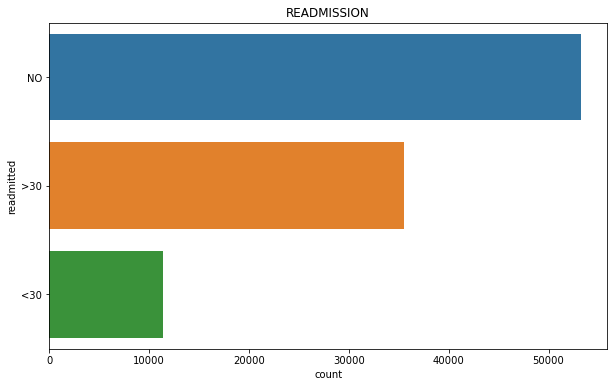

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(y='readmitted',data=df)
plt.title('READMISSION')

no and >30 convert to 0 since both mean that person will not be readmitted 'within' 30 days and for <30 it means person was readmitted within 30 days

In [33]:
df.replace({'readmitted': {'NO': 0, '>30': 0, '<30': 1 }}, inplace=True)

eliminating the data where diag1,diag2,diag3 all this 3 values are missing 

In [34]:
df['diag_1'].replace(np.nan,'?',inplace=True)
df['diag_2'].replace(np.nan,'?',inplace=True)
df['diag_3'].replace(np.nan,'?',inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100111 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              100111 non-null  int64 
 1   patient_nbr               100111 non-null  int64 
 2   race                      100111 non-null  object
 3   gender                    100111 non-null  object
 4   age                       100111 non-null  object
 5   admission_type_id         100111 non-null  int64 
 6   discharge_disposition_id  100111 non-null  int64 
 7   admission_source_id       100111 non-null  int64 
 8   time_in_hospital          100111 non-null  int64 
 9   num_lab_procedures        100111 non-null  int64 
 10  num_procedures            100111 non-null  int64 
 11  num_medications           100111 non-null  int64 
 12  number_outpatient         100111 non-null  int64 
 13  number_emergency          100111 non-null  int64 
 14  numb

In [36]:
diag_missing=df[(df['diag_1'] == '?' ) | (df['diag_2'] == '?' ) | (df['diag_3'] == '?')].index

In [37]:
diag_missing

Int64Index([     0,     66,    192,    194,    216,    249,    263,    283,
               286,    294,
            ...
             99702,  99979, 100559, 100787, 101173, 101192, 101278, 101474,
            101560, 101719],
           dtype='int64', length=1520)

In [38]:
df.drop(diag_missing,inplace=True)

In [39]:
df.shape

(98591, 45)

In [41]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

There are no null value , there are no duplicates and our data is now entirely clean, now further we will perform visulization and get some insights from our data 

# Data Visulization

In [42]:
dfgraphs=df.copy()

we will use dfgraphs to perform our visulization

In [43]:
dfgraphs.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,15,1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,45,1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,55,1,1,1,3,31,...,No,Steady,No,No,No,No,No,No,Yes,0


In [44]:
dfgraphs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98591 entries, 1 to 101765
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              98591 non-null  int64 
 1   patient_nbr               98591 non-null  int64 
 2   race                      98591 non-null  object
 3   gender                    98591 non-null  object
 4   age                       98591 non-null  object
 5   admission_type_id         98591 non-null  int64 
 6   discharge_disposition_id  98591 non-null  int64 
 7   admission_source_id       98591 non-null  int64 
 8   time_in_hospital          98591 non-null  int64 
 9   num_lab_procedures        98591 non-null  int64 
 10  num_procedures            98591 non-null  int64 
 11  num_medications           98591 non-null  int64 
 12  number_outpatient         98591 non-null  int64 
 13  number_emergency          98591 non-null  int64 
 14  number_inpatient     

<AxesSubplot:xlabel='readmitted', ylabel='count'>

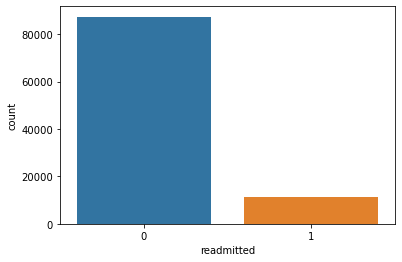

In [45]:
sns.countplot(dfgraphs['readmitted'])

<b>Insight from above graph: </b>Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

Text(0.5, 1.0, 'age vs count')

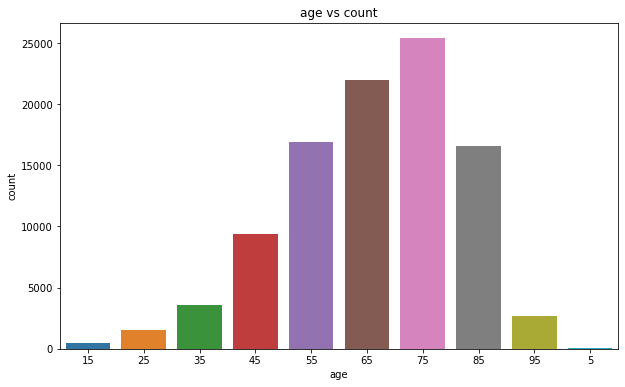

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='age',data=dfgraphs)
plt.title('age vs count')

<b>Insight from above graph:</b>people with age group 75 have maximum count 

In [47]:
from wordcloud import WordCloud

In [48]:
text = " ".join(race for race in dfgraphs.race)

In [49]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

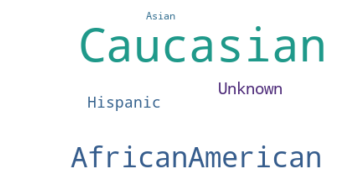

In [50]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<b>Insight from above graph:</b> race Caucasian is the highest followed by AfricanAmerican

In [51]:
dfgraphs[(dfgraphs['age']=='5') & (dfgraphs['readmitted']==1)]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
26425,87117360,64230939,Caucasian,Female,5,3,1,1,3,36,...,No,Up,No,No,No,No,No,Ch,Yes,1


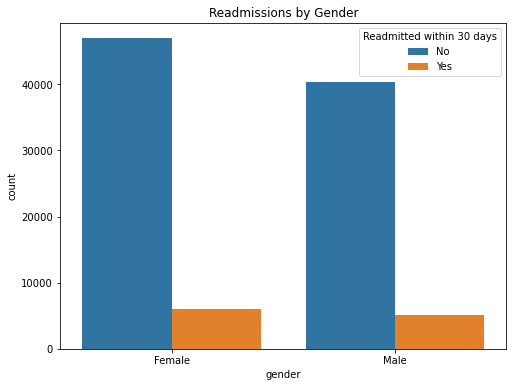

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'gender', hue = 'readmitted', data = dfgraphs) 
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by Gender')
plt.show();

<b>Insight from above graph: </b>from the above graph we can say that the readmission rate of female is more as compared to male 

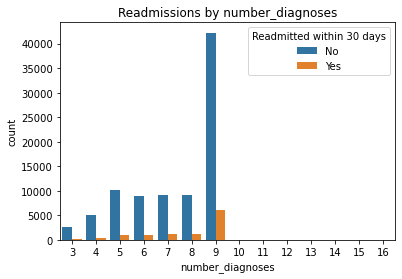

In [53]:
sns.countplot(x = 'number_diagnoses', hue = 'readmitted', data = dfgraphs)
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by number_diagnoses')
plt.show();

<b>Insight from above graph: </b>number of diagnoses 9 has maximum rate of readmission 

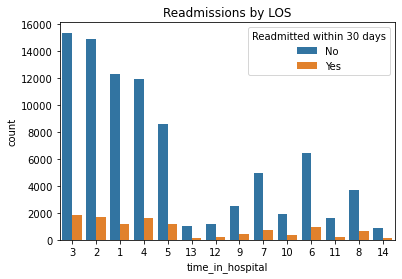

In [54]:
sns.countplot(x = 'time_in_hospital', hue = 'readmitted', data = df, order = df.time_in_hospital.unique().tolist()) 
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by LOS')
plt.show();      


<b>Insight from above graph: </b>Mostly patient between 2 to 4 days are admitted frequently

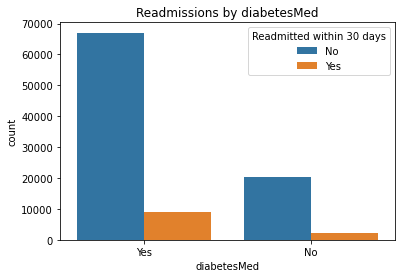

In [55]:
sns.countplot(x = 'diabetesMed', hue = 'readmitted', data = dfgraphs) 
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by diabetesMed')
plt.show();

<b>Insight from above graphs: </b>Patients provided with diabetes medication are readmitted often

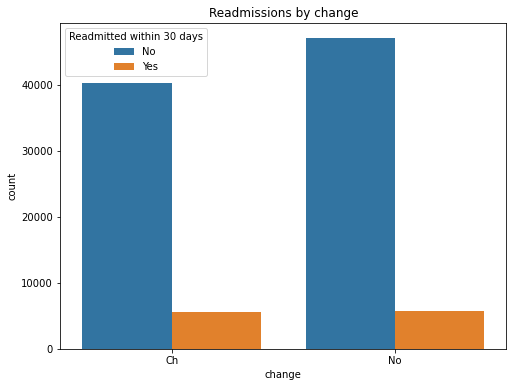

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'change', hue = 'readmitted', data = dfgraphs)
plt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
plt.title('Readmissions by change')
plt.show();

<b>Insight from above graph: </b>Readmission rate looks similar wheteher the change of mediacation occurs or not

<Figure size 576x1224 with 0 Axes>

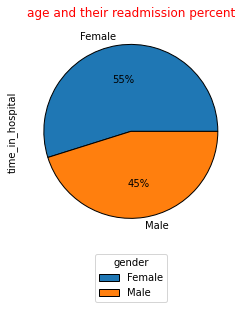

In [58]:
plt.figure(figsize=(8,17))
dfgraphs.groupby(['gender']).sum().plot(kind='pie', y='time_in_hospital', autopct='%1.0f%%', labeldistance=1.1,wedgeprops={'edgecolor':'k'}) 
plt.legend(title='gender',loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.title('age and their readmission percent',color='r')
plt.show();

<b>Insight from above graph: </b>Female have spend more time in hospital 

<Figure size 576x1224 with 0 Axes>

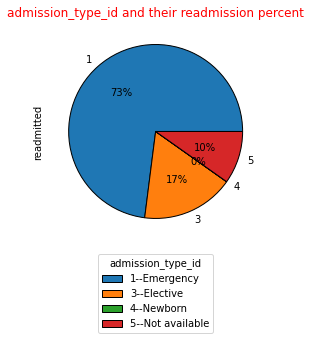

In [59]:
plt.figure(figsize=(8,17))
dfgraphs.groupby(['admission_type_id']).sum().plot(kind='pie', y='readmitted', autopct='%1.0f%%', labeldistance=1.1,wedgeprops={'edgecolor':'k'})
labels=['1--Emergency','3--Elective','4--Newborn','5--Not available']
plt.legend(labels,title='admission_type_id',loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=1)
plt.title('admission_type_id and their readmission percent',color='r')
plt.show();

<b>Insight from above graph: </b> Admission_type_id 1(i.e Emergency) have a large readmission rate followed by admission_type_id 3(i.e elective)

In [60]:
qq=dfgraphs.groupby("age")["readmitted"].mean().reset_index()

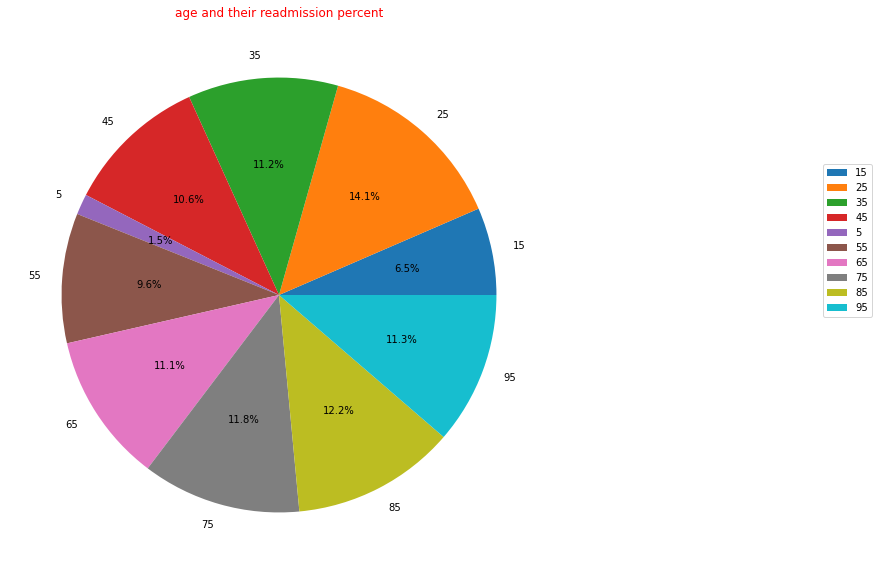

In [61]:
fig=plt.figure(figsize=(20,10))
per_gender=pd.Series(qq["age"])
per_time=pd.Series(qq["readmitted"])
plt.pie(per_time,labels=per_gender,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1.6, 0.6),loc='center right')
plt.title('age and their readmission percent',color='r')
plt.show()

<b>Insight from above graph:</b> From age feature we can see that majority of patients have higher age(ie 85,75,65,55) , age can be one of the factors for early readmission

<AxesSubplot:xlabel='age', ylabel='time_in_hospital'>

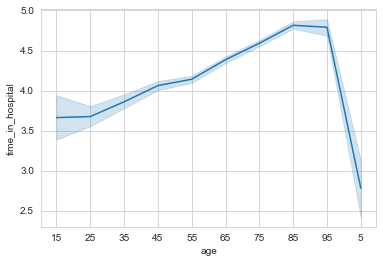

In [62]:
sns.set_style(style='whitegrid')
sns.lineplot(x='age',y='time_in_hospital',data=dfgraphs)

<b>Insight from above graph: </b>The age group between 85 to 95 have spend maximum time in hospital 

<AxesSubplot:xlabel='number_diagnoses', ylabel='Density'>

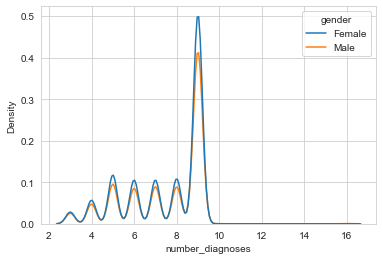

In [63]:
sns.kdeplot(data=dfgraphs,x='number_diagnoses',hue='gender')

<b>Insight from above graph: </b> number of diagnoses are almost the same in both male and female,number_diagnoses 9 is the highest in male as well as female 

Text(0.5, 1.0, 'admission_source_id vs count')

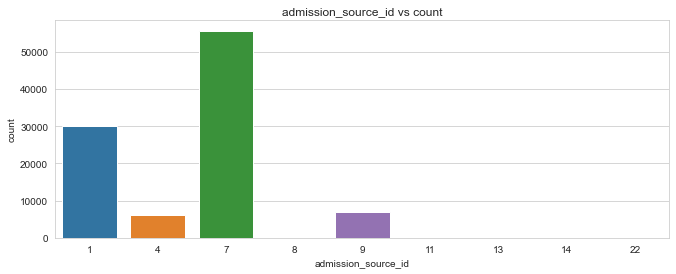

In [64]:
plt.figure(figsize=(11,4))
sns.countplot(x='admission_source_id',data=dfgraphs)
# plt.legend(title = 'admission_source_id', labels = ('1-- Physician Referral', '4--Transfer from a hospital','7-- Emergency Room','9-- Not Available'))
plt.title('admission_source_id vs count')

<b> Insight from above graph: </b> admission_source_id 7 (ie emergency room) is the highest 

In [65]:
def discharge(ids):
        if ids==1:
            return 'Discharged to home'
        elif ids==2:
            return 'transfer to another short term hospital'
        elif ids==7:
            return 'left AMA'
        elif ids==9:
            return'admitted as an inpatient to this hospital'
        elif ids==12:
            return 'Still patient or expected to return for outpatient services' 
        elif ids==14:
            return'hospice'
        else:
            return'not available'

In [66]:
dg=dfgraphs.copy()

In [67]:
dfgraphs['discharge_disposition_id']=dfgraphs['discharge_disposition_id'].apply(discharge)

Text(0.5, 1.0, 'discharge_disposition_id vs count')

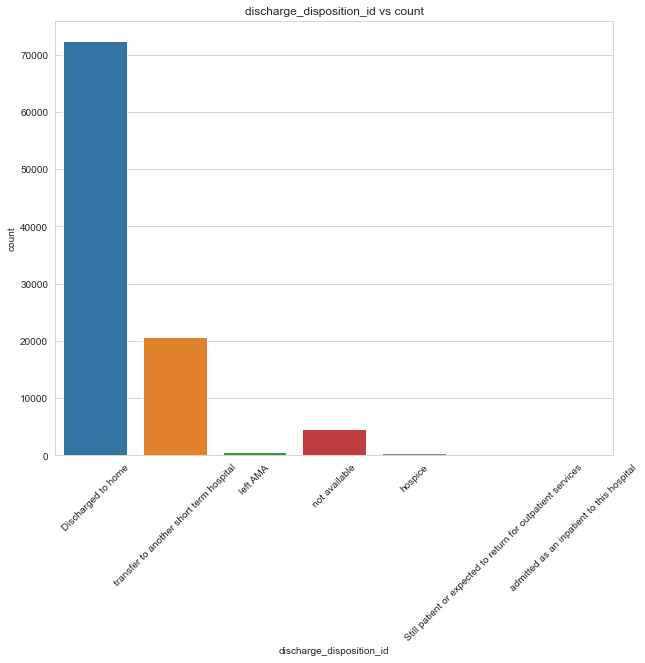

In [68]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 45)
sns.countplot(x='discharge_disposition_id',data=dfgraphs)
plt.title('discharge_disposition_id vs count')

<b>Insight from above graph: </b> Discharge id 1 ie dischage to home is the highest in our data followed by id 2 ie transfer to another short term hospital 

<AxesSubplot:xlabel='age', ylabel='num_medications'>

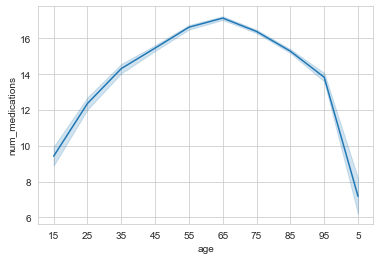

In [69]:
sns.set_style(style='whitegrid')
sns.lineplot(x='age',y='num_medications',data=dfgraphs)

<b>Insight from above graph:</b>maximum number of medicatons are take by age group 65 

<AxesSubplot:xlabel='time_in_hospital', ylabel='number_emergency'>

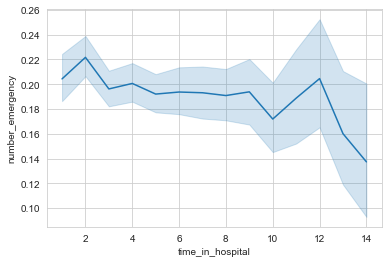

In [70]:
sns.set_style(style='whitegrid')
sns.lineplot(x='time_in_hospital',y='number_emergency',data=dfgraphs)

<b>Insight from above graph: </b>as the time in hospital increased the number of emergency decreased (13-14 there is a huge drop in number of emergency)

<AxesSubplot:xlabel='time_in_hospital', ylabel='num_procedures'>

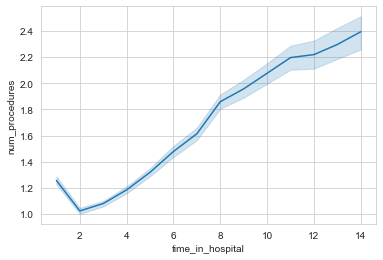

In [71]:
sns.set_style(style='whitegrid')
sns.lineplot(x='time_in_hospital',y='num_procedures',data=dfgraphs)

<b>Insight from above graph:</b> as the time in hospital increases the number of procedures also increases

<AxesSubplot:xlabel='age', ylabel='number_emergency'>

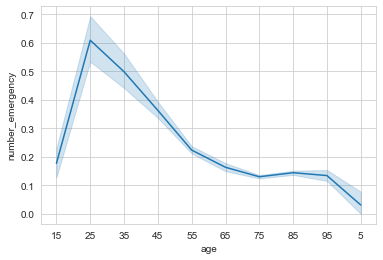

In [72]:
sns.set_style(style='whitegrid')
sns.lineplot(x='age',y='number_emergency',data=dfgraphs)

<b>Insight from above graph:</b>maximum number of emergecy were at the age of 25 

visual representation of all the medications 

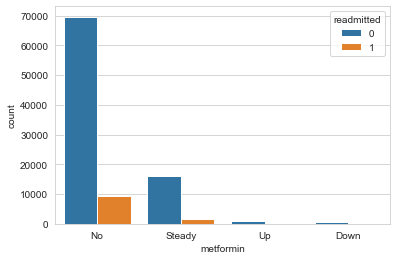

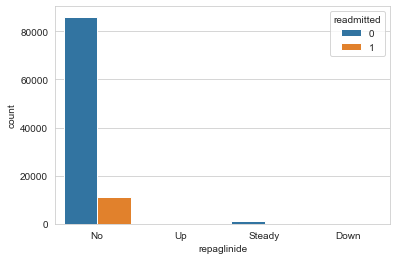

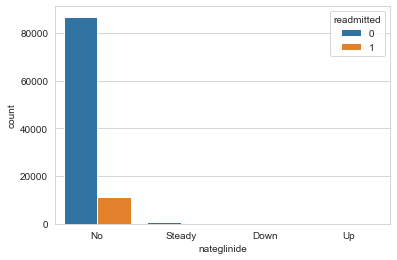

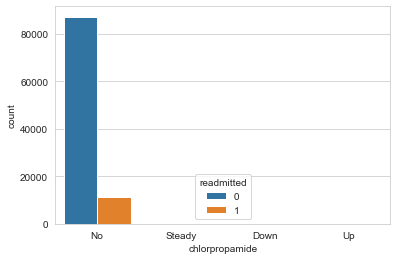

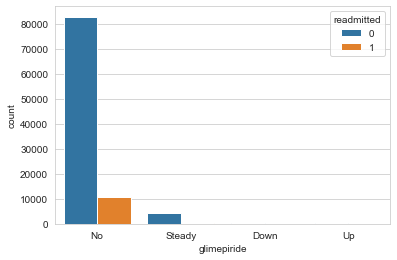

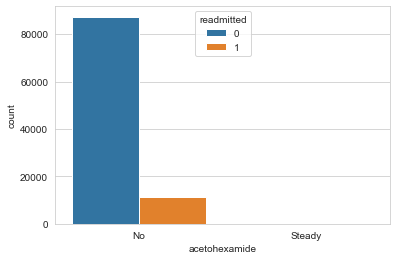

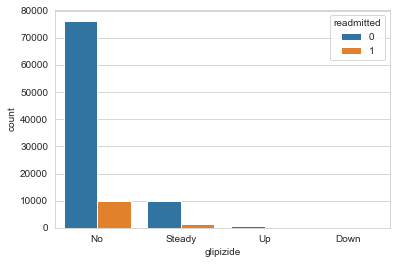

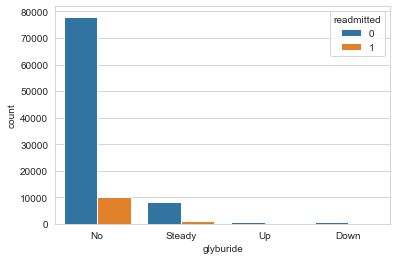

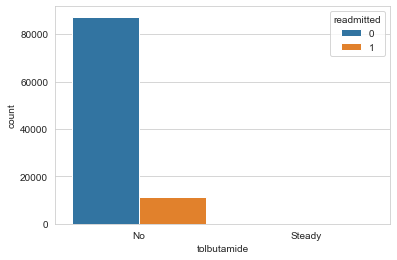

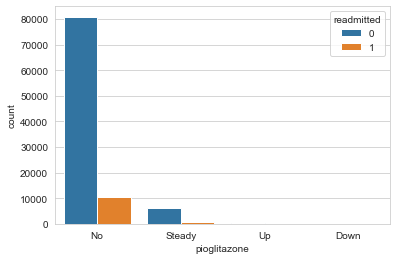

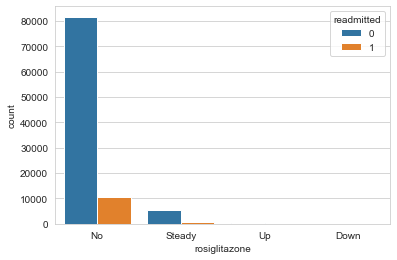

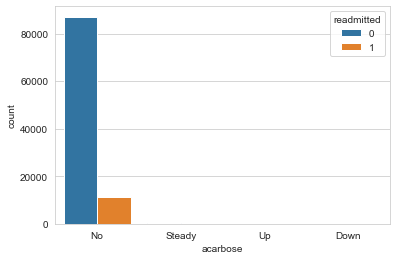

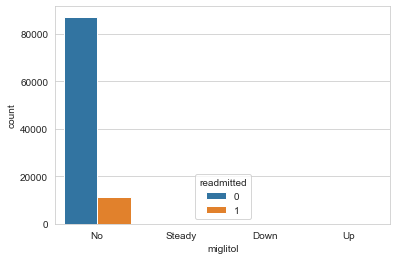

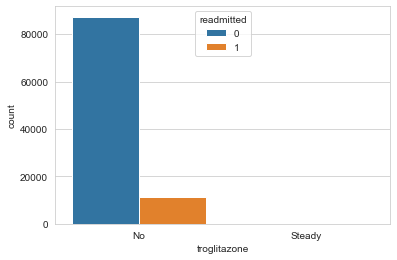

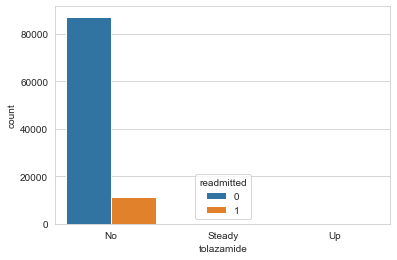

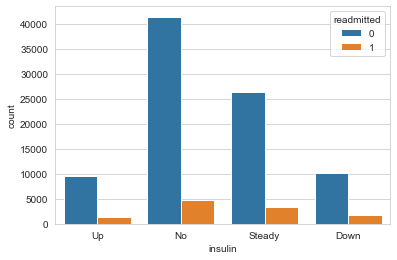

In [73]:
sns.countplot(data=dfgraphs,x='metformin',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='repaglinide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='nateglinide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='chlorpropamide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='glimepiride',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='acetohexamide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='glipizide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='glyburide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='tolbutamide',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='pioglitazone',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x='rosiglitazone',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x= 'acarbose',hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x= 'miglitol', hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x= 'troglitazone', hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x= 'tolazamide', hue='readmitted')
plt.show();
sns.countplot(data=dfgraphs,x= 'insulin', hue='readmitted')
plt.show();


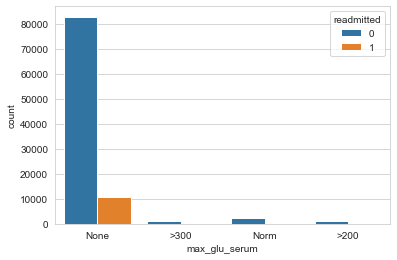

In [74]:
sns.countplot(data=dfgraphs,x='max_glu_serum',hue='readmitted')
plt.show();


Glucose serum test result - Indicates the range of the result or if the test was not taken

<b>Insight from above graph:</b> Patient who doen't take max glue serum test is readmitted often

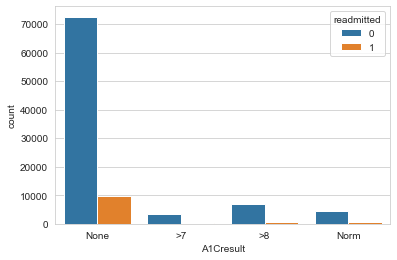

In [75]:
sns.countplot(data=dfgraphs,x='A1Cresult',hue='readmitted')
plt.show();

>8 if the result was greater than 8%,
>7 if the result was greater than 7% but less than 8%,
normal if the result was less than 7%,
none if not measured.

<b>Insight from above graph:</b> Patient who doen't take a1ctest is readmitted often 

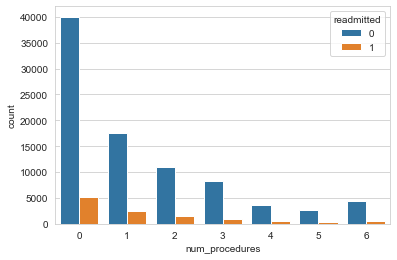

In [76]:
sns.countplot(data=dfgraphs,x='num_procedures',hue='readmitted')
plt.show();

<b>Insight from above graph:</b>less the number of prcedures more the count of readmission

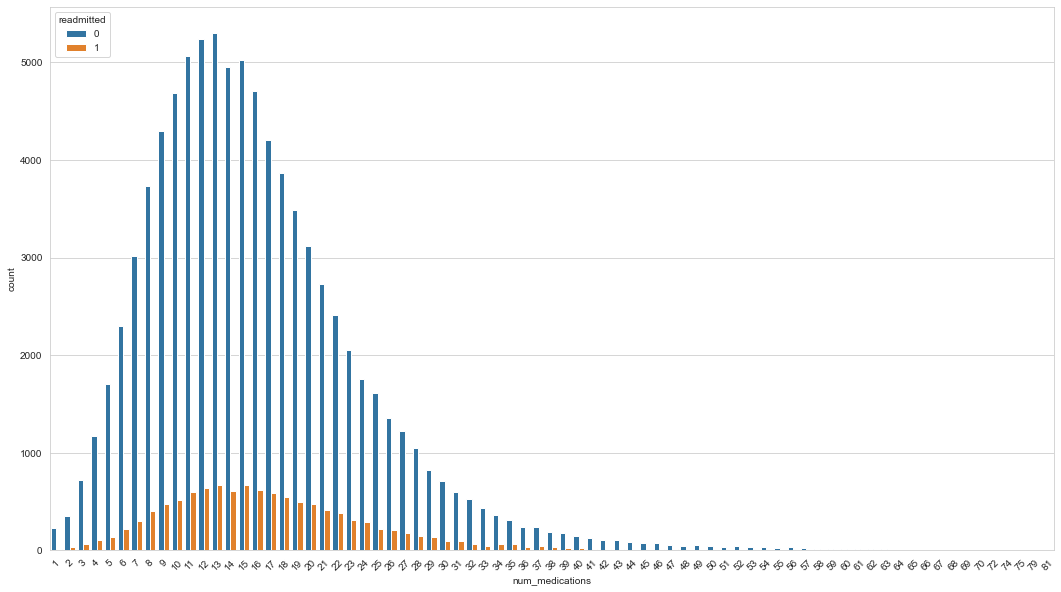

In [77]:
plt.figure(figsize=(18,10))
sns.countplot(data=dfgraphs,x='num_medications',hue='readmitted')
plt.xticks(rotation = 45)
plt.show();

<b>Insight from above graph:</b>as we can see number of medications between 9 to 20 have high chance of readmission 

# Checking the Outliers 

In [78]:
new_df=dfgraphs.copy()

Droping the columns that wont play any role in telling us weather the patient will be readmitted or not  

In [79]:
new_df.drop(['encounter_id','patient_nbr','race'],axis=1,inplace=True) 

In [80]:
df_numeric=new_df.select_dtypes('int64')

In [81]:
df_numeric.columns

Index(['admission_type_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted'],
      dtype='object')

In [82]:
df_numeric

,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
1,1,7,3,59,0,18,0,0,0,9,0
2,1,7,2,11,5,13,2,0,1,6,0
3,1,7,2,44,1,16,0,0,0,7,0
4,1,7,1,51,0,8,0,0,0,5,0
5,1,1,3,31,6,16,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,3,51,0,16,0,0,0,9,0
101762,1,4,5,33,3,18,0,0,1,9,0
101763,1,7,1,53,0,9,1,0,0,13,0
101764,1,7,10,45,2,21,0,0,1,9,0


In [83]:
from scipy.stats import skew

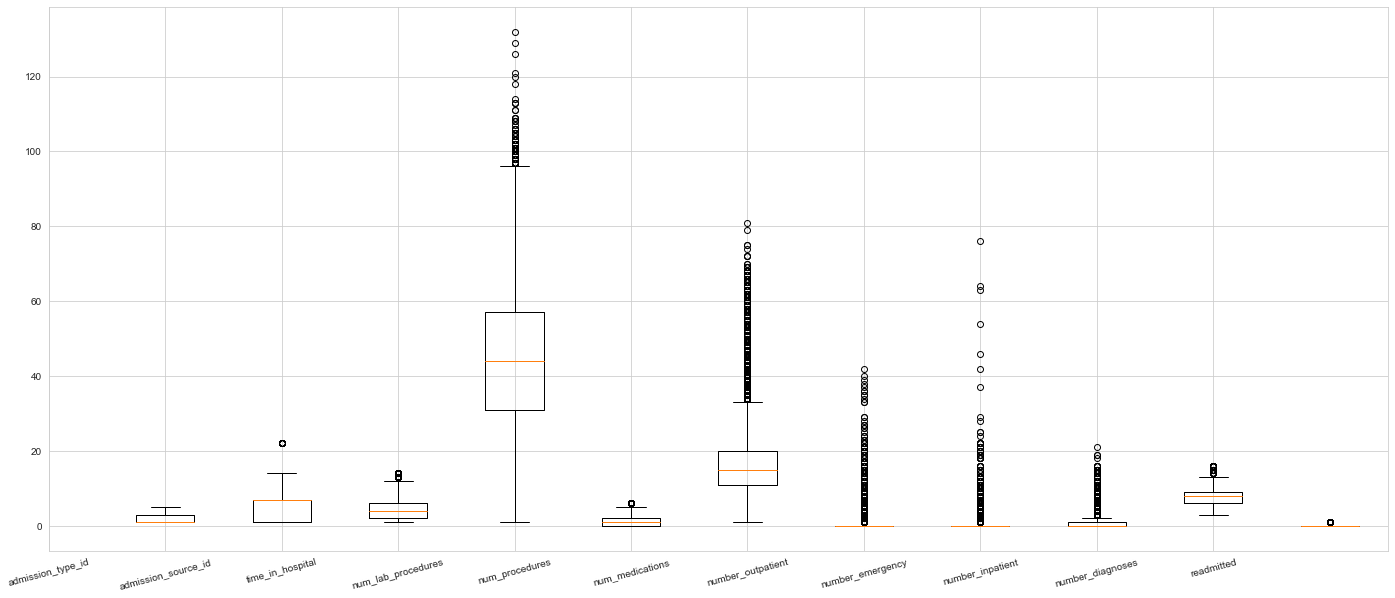

In [88]:
plt.figure(figsize=(24, 10))
plt.boxplot(df_numeric)
plt.xticks(range(len(df_numeric.columns.values)),df_numeric.columns.values, rotation = 15)
plt.show()

In [89]:
for k, v in df_numeric.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        IQR = q3 - q1
        v_col = v[(v < q1 - 1.5 * IQR) | (v > q3 + 1.5 * IQR)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(new_df)[0]
        print(" %s outliers = %.2f%%" % (k, perc))

 admission_type_id outliers = 0.00%
 admission_source_id outliers = 0.01%
 time_in_hospital outliers = 2.21%
 num_lab_procedures outliers = 0.12%
 num_procedures outliers = 4.87%
 num_medications outliers = 3.32%
 number_outpatient outliers = 16.60%
 number_emergency outliers = 11.25%
 number_inpatient outliers = 6.93%
 number_diagnoses outliers = 0.06%
 readmitted outliers = 11.41%


As from the above percentage code for outliers we can see that there are no such extreme outilers   

In [90]:
new_df['z_score_outpatient']=(new_df['number_outpatient']-new_df['number_outpatient'].mean())/new_df['number_outpatient'].std()

In [91]:
new_df['z_score_outpatient']

1        -0.293249
2         1.280436
3        -0.293249
4        -0.293249
5        -0.293249
            ...   
101761   -0.293249
101762   -0.293249
101763    0.493593
101764   -0.293249
101765   -0.293249
Name: z_score_outpatient, Length: 98591, dtype: float64

In [92]:
new_df[(new_df['z_score_outpatient']<-3) | (new_df['z_score_outpatient']>3)]   #outliers in outpatient 

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,z_score_outpatient
167,Female,35,1,Discharged to home,7,2,18,0,15,5,...,Down,No,No,No,No,No,Ch,Yes,1,3.640964
304,Male,25,1,Discharged to home,7,3,90,0,15,7,...,Up,No,No,No,No,No,Ch,Yes,1,5.214649
733,Male,25,1,Discharged to home,7,6,81,2,27,9,...,Down,No,No,No,No,No,Ch,Yes,1,6.788334
940,Male,25,1,Discharged to home,7,3,46,0,11,9,...,Steady,No,No,No,No,No,No,Yes,0,6.788334
1582,Female,75,1,Discharged to home,7,4,41,4,16,8,...,Steady,No,No,No,No,No,No,Yes,1,6.001491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101592,Female,65,1,Discharged to home,7,9,72,1,22,5,...,No,No,No,No,No,No,No,No,0,3.640964
101650,Female,65,1,Discharged to home,1,1,30,0,3,11,...,No,No,No,No,No,No,No,No,1,8.362019
101658,Female,45,1,Discharged to home,7,10,45,1,11,5,...,Steady,No,No,No,No,No,No,Yes,0,3.640964
101673,Female,55,1,Discharged to home,7,2,55,0,13,5,...,Up,No,No,No,No,No,Ch,Yes,0,3.640964


In [93]:
new1=new_df.copy()

In [94]:
new_df['z_score_emergency']=(new_df['number_emergency']-new_df['number_emergency'].mean())/new_df['number_emergency'].std()

In [95]:
new_df[(new_df['z_score_emergency']<-3) | (new_df['z_score_emergency']>3)]   #emergency outliers

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,z_score_outpatient,z_score_emergency
1716,Female,35,1,Discharged to home,7,4,81,0,11,4,...,No,No,No,No,No,Ch,Yes,0,2.854121,4.048545
2958,Female,35,1,Discharged to home,7,1,56,0,9,3,...,No,No,No,No,No,No,Yes,0,2.067278,4.048545
4131,Male,35,5,Discharged to home,9,5,68,0,12,0,...,No,No,No,No,No,No,No,0,-0.293249,9.374935
4229,Male,45,5,Discharged to home,9,3,24,0,14,0,...,No,No,No,No,No,Ch,Yes,0,-0.293249,4.048545
5102,Male,35,1,Discharged to home,9,1,11,0,6,0,...,No,No,No,No,No,No,Yes,1,-0.293249,7.244379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101555,Female,65,1,Discharged to home,7,2,1,1,12,0,...,No,No,No,No,No,Ch,Yes,0,-0.293249,5.113823
101579,Male,35,1,Discharged to home,7,6,52,2,19,1,...,No,No,No,No,No,No,No,1,0.493593,5.113823
101621,Female,55,3,Discharged to home,1,6,35,0,14,0,...,No,No,No,No,No,No,Yes,1,-0.293249,16.831882
101629,Male,25,3,Discharged to home,7,2,9,1,13,0,...,No,No,No,No,No,Ch,Yes,1,-0.293249,7.244379


# Performing Label Encoding 

In [96]:
df2=new_df.copy()

In [97]:
df2.drop(['z_score_outpatient','z_score_emergency'],axis=1,inplace=True)

In [98]:
# df9=df2.copy()

In [99]:
cat_data=df2.select_dtypes('object')

In [100]:
cat_data.columns

Index(['gender', 'age', 'discharge_disposition_id', 'diag_1', 'diag_2',
       'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [101]:
from sklearn.preprocessing import LabelEncoder


In [102]:
lbe=LabelEncoder()

In [103]:
for colu in df2:
    df2[colu]=lbe.fit_transform(df2[colu])

In [104]:
df2

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,0,0,0,0,2,2,58,0,17,0,...,0,3,1,0,0,0,0,0,1,0
2,0,1,0,0,2,1,10,5,12,2,...,0,1,1,0,0,0,0,1,1,0
3,1,2,0,0,2,1,43,1,15,0,...,0,3,1,0,0,0,0,0,1,0
4,1,3,0,0,2,0,50,0,7,0,...,0,2,1,0,0,0,0,0,1,0
5,1,5,0,0,0,2,30,6,15,0,...,0,2,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,0,6,2,2,50,0,15,0,...,0,0,1,0,0,0,0,0,1,0
101762,0,8,0,6,1,4,32,3,17,0,...,0,2,1,0,0,0,0,1,1,0
101763,1,7,0,0,2,0,52,0,8,1,...,0,0,1,0,0,0,0,0,1,0
101764,0,8,0,6,2,9,44,2,20,0,...,0,3,1,0,0,0,0,0,1,0


we have perform label encoding on dataframe df2

# Checking Skewness

There are 3 techniques to remove skewness:

1)log method 

2)sqrt method

3)boxcox 

In [105]:
df_numeric_data=df2.select_dtypes('int64')

In [106]:
df_numeric_data.columns

Index(['admission_type_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'readmitted'],
      dtype='object')

Skewness Value is 1.9302657772576697


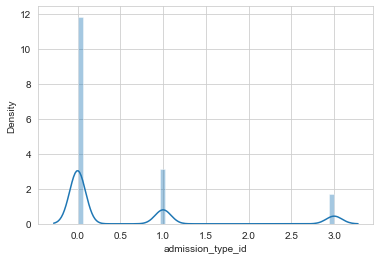

Skewness Value is 0.18930557966093411


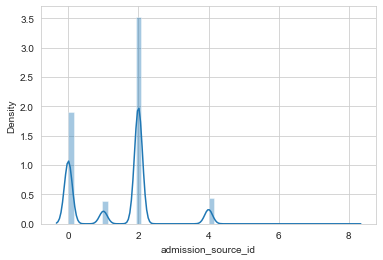

Skewness Value is 1.1278760840870412


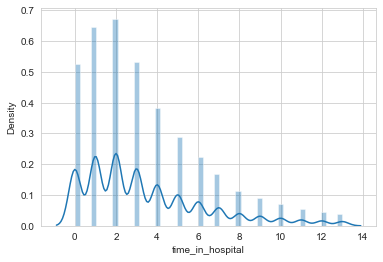

Skewness Value is -0.24392683341818377


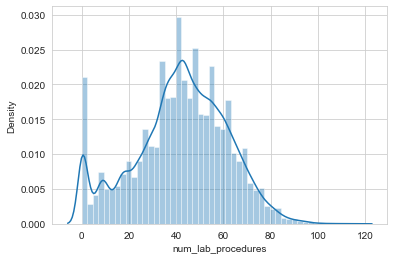

Skewness Value is 1.3145121029453928


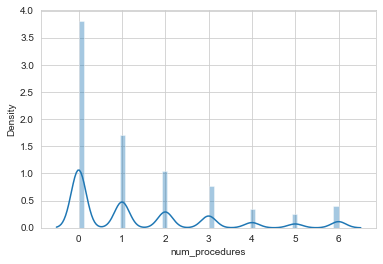

Skewness Value is 1.3402600067845556


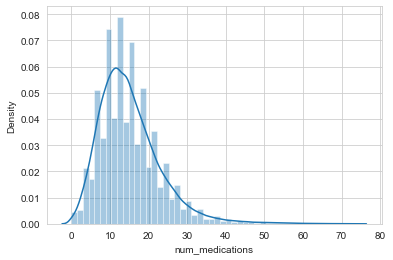

Skewness Value is 8.327880689013078


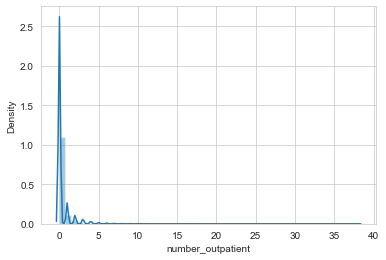

Skewness Value is 11.499068575620182


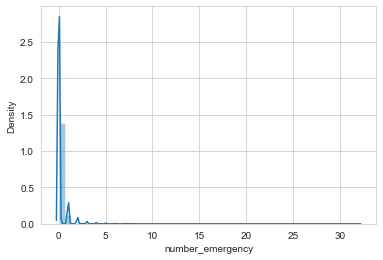

Skewness Value is 3.5637688245145376


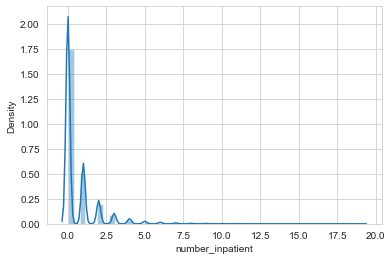

Skewness Value is -0.7838766641137546


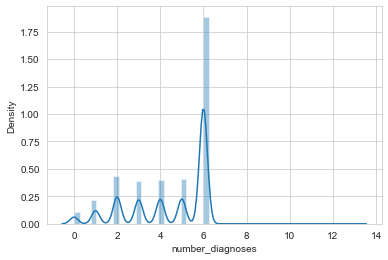

Skewness Value is 2.4274369056652545


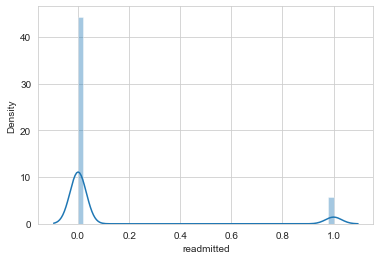

In [107]:
for cole in df_numeric_data:
    print(f'Skewness Value is {skew(df_numeric_data[cole])}')
    sns.distplot(df_numeric_data[cole])
    plt.show()

As we can see from the graphs above discharge_disposition_id,number_outpatient,number_inpatient and number_emergency are highly skewed

In [108]:
df2['discharge_disposition_id'].skew()

1.095852316269492

In [109]:
df2['number_outpatient'].skew()

8.328007394938435

In [110]:
 df2['number_inpatient'].skew()     

3.563823046067838

In [111]:
df2['number_emergency'].skew()

11.499243530110888

we will try to reduce the skewness using sqrt method 

In [112]:
df2['discharge_disposition_id']=np.sqrt(df2['discharge_disposition_id'])

In [113]:
df2['number_inpatient']=np.sqrt(df2['number_inpatient'])

In [114]:
df2['number_outpatient']=np.sqrt(df2['number_outpatient'])

In [115]:
df2['number_emergency']=np.sqrt(df2['number_emergency'])

In [116]:
df2['discharge_disposition_id'].skew()

1.0700682703184108

In [117]:
df2['number_inpatient'].skew()

1.2942397306360132

In [118]:
df2['number_outpatient'].skew()

2.707205121696364

In [119]:
df2['number_emergency'].skew()

3.481361864305842

In [120]:
# df11=df2.copy()

# Checking the correlation 

If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results. Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation

In [121]:
df_numeric_data.corr().style.background_gradient()

,admission_type_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
admission_type_id,1.000000,0.112208,-0.022459,-0.127644,0.082489,0.075657,0.048091,-0.017631,-0.032426,-0.099211,-0.010580
admission_source_id,0.112208,1.000000,-0.004372,0.094942,-0.166643,-0.073173,0.021342,0.074900,0.049729,0.099071,0.011090
time_in_hospital,-0.022459,-0.004372,1.000000,0.320708,0.187819,0.461766,-0.011041,-0.010097,0.072782,0.211114,0.044427
num_lab_procedures,-0.127644,0.094942,0.320708,1.000000,0.051856,0.265977,-0.007818,-0.000196,0.038620,0.148498,0.022708
num_procedures,0.082489,-0.166643,0.187819,0.051856,1.000000,0.378938,-0.027008,-0.043071,-0.069119,0.055761,-0.011376
num_medications,0.075657,-0.073173,0.461766,0.265977,0.378938,1.000000,0.044056,0.015009,0.062729,0.243466,0.038842
number_outpatient,0.048091,0.021342,-0.011041,-0.007818,-0.027008,0.044056,1.000000,0.100997,0.108501,0.094071,0.018789
number_emergency,-0.017631,0.074900,-0.010097,-0.000196,-0.043071,0.015009,0.100997,1.000000,0.294604,0.061550,0.066856
number_inpatient,-0.032426,0.049729,0.072782,0.038620,-0.069119,0.062729,0.108501,0.294604,1.000000,0.102609,0.165955
number_diagnoses,-0.099211,0.099071,0.211114,0.148498,0.055761,0.243466,0.094071,0.061550,0.102609,1.000000,0.048936


as we can see from the above graph there is no high correlation 

# Model Building and Evaluation

Goal is to predict with the help of given features whether the patient will be readmitted within 30 days or not 

splitting x and y 

In [122]:
x=df2.iloc[0:,0:-1]   

In [123]:
x

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,0,0,0,0.00000,2,2,58,0,17,0.000000,...,0,0,3,1,0,0,0,0,0,1
2,0,1,0,0.00000,2,1,10,5,12,1.414214,...,0,0,1,1,0,0,0,0,1,1
3,1,2,0,0.00000,2,1,43,1,15,0.000000,...,0,0,3,1,0,0,0,0,0,1
4,1,3,0,0.00000,2,0,50,0,7,0.000000,...,0,0,2,1,0,0,0,0,0,1
5,1,5,0,0.00000,0,2,30,6,15,0.000000,...,0,0,2,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,7,0,2.44949,2,2,50,0,15,0.000000,...,0,0,0,1,0,0,0,0,0,1
101762,0,8,0,2.44949,1,4,32,3,17,0.000000,...,0,0,2,1,0,0,0,0,1,1
101763,1,7,0,0.00000,2,0,52,0,8,1.000000,...,0,0,0,1,0,0,0,0,0,1
101764,0,8,0,2.44949,2,9,44,2,20,0.000000,...,0,0,3,1,0,0,0,0,0,1


In [124]:
y=df2.iloc[0:,-1]

In [125]:
y

1         0
2         0
3         0
4         0
5         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 98591, dtype: int64

splitting x into xtrain and xtest 
splitting y into ytrain and ytest and then perform train_test_split 
,test_size is how much amount of data we want to put in for testing 
,we perform stratify to balance out our data 

In [126]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

<b>Classification report-</b>A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model

In [127]:
from sklearn.metrics import classification_report

we will perform LogisticRegression on our model 

<b>logistic regression-</b>Logistic regression is an example of supervised learning,It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
logreg=LogisticRegression()

In [130]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [131]:
ypred=logreg.predict(xtest)

In [132]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<b>accuracy_score-</b> is an evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made

<b>confusion_matrix-</b> A confusion matrix is a table that is used to define the performance of a classification algorithm.

<b>roc_auc_score-</b> roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds

In [133]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac=accuracy_score(ytest,ypred)
print(f'accuracy score is {ac}')

accuracy score is 0.8857596862532964


In [134]:
train_score=logreg.score(xtrain,ytrain)
test_score=logreg.score(xtest,ytest)
print(f'Training score is {train_score}')
print(f'Testing score is {test_score}')
print(classification_report(ytest,ypred))

Training score is 0.8858910640024343
Testing score is 0.8857596862532964
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26203
           1       0.00      0.00      0.00      3375

    accuracy                           0.89     29578
   macro avg       0.44      0.50      0.47     29578
weighted avg       0.78      0.89      0.83     29578



we have got great train and test score (low bias and low variance) and there is no overfitting and no underfitting 

now lets check the confusion_matrix

Table that describes the performance of a classification model.

True Positives (TP): we correctly predicted that they do have diabetes

True Negatives (TN): we correctly predicted that they don't have diabetes

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")

In [135]:
cm=confusion_matrix(ytest,ypred)
print(cm) 

[[26199     4]
 [ 3375     0]]


as we can see type 2 error is very high ,so will try to reduce it 

In [136]:
ra=roc_auc_score(ytest,ypred)
print(f'ROC_AUC_SCORE {ra}')

ROC_AUC_SCORE 0.49992367286188605


In [137]:
print(f'actual values: {ytest[:80].values}')
print(f'pred values: {ypred[:80]}')

actual values: [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
pred values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [138]:
 logreg.predict_proba(xtest)      

array([[0.91882883, 0.08117117],
       [0.93285313, 0.06714687],
       [0.90346425, 0.09653575],
       ...,
       [0.90650734, 0.09349266],
       [0.87144362, 0.12855638],
       [0.9131244 , 0.0868756 ]])

In [139]:
ypredprob=logreg.predict_proba(xtest)[:,1]

In [140]:
ypredprob

array([0.08117117, 0.06714687, 0.09653575, ..., 0.09349266, 0.12855638,
       0.0868756 ])

In [141]:
from sklearn.preprocessing import binarize

In [142]:
y_pred=binarize([ypredprob],threshold=0.1)[0]

In [143]:
y_pred

array([0., 0., 0., ..., 0., 1., 0.])

In [144]:
ac=accuracy_score(ytest,y_pred) 
cm=confusion_matrix(ytest,y_pred)
print(ac)
print(cm)

0.529346135641355
[[13366 12837]
 [ 1084  2291]]


now as we can see after performing the required steps , type 2 error has reduced 

In [145]:
ra=roc_auc_score(ytest,y_pred)

In [146]:
print(ra)

0.5944545394151928


we have got great train and test score (low bias and low variance) and there is no overfitting and no underfitting ,but as we can see precision,recall,f1-score is 0.00 for 1 so we will have to use SMOTE teachnique to make it better 

In [147]:
# SMOTE (we only apply this on training data) 

In [148]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
sm=SMOTE(random_state=2)

In [151]:
X=df2.iloc[0:,0:-1]

In [152]:
Y=df2.iloc[0:,-1]

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2,stratify=Y)

In [155]:
print( X_train.shape)
print( Y_train.shape)
print( X_test.shape)
print( Y_test.shape)

(69013, 41)
(69013,)
(29578, 41)
(29578,)


In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
lg=LogisticRegression()

In [158]:
lg.fit(X_train,Y_train)       

LogisticRegression()

In [159]:
y_pred=lg.predict(X_test)

In [160]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     26203
           1       0.00      0.00      0.00      3375

    accuracy                           0.89     29578
   macro avg       0.44      0.50      0.47     29578
weighted avg       0.78      0.89      0.83     29578



In [162]:
sm=SMOTE(random_state=2)

In [163]:
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)  

In [164]:
lg1=LogisticRegression()

In [165]:
lg1.fit(X_train_res,Y_train_res)  

LogisticRegression()

In [166]:
pre=lg1.predict(X_test)

In [167]:
train_scores=lg1.score(X_train_res,Y_train_res)
test_scores=lg1.score(X_test,Y_test)
print(f'Training score is {train_scores}')
print(f'Testing score is {test_scores}')

print(classification_report(Y_test,pre))

Training score is 0.6999247603781609
Testing score is 0.6918317668537426
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



As we can see after performing smote teachnique we get better precision,recall,f1-score for 1 

Now we will try various models on our data and select the most appropriate one 

<b>KNeighborsClassifier- </b>is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point

<b>DecisionTree- </b> A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks



In [168]:
def mymodel(model):
    model.fit(X_train_res,Y_train_res)
    ypred = model.predict(X_test)
    
    train = model.score(X_train_res,Y_train_res)
    test = model.score(X_test,Y_test)
    print(f'Trainig Score is {train}')
    print(f'Test Score is {test}')
    
    print(classification_report(Y_test,pre))
    return model

In [169]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [170]:
# knn = mymodel(KNeighborsClassifier())

In [171]:
# trainac = []
# testac = []

# for i in range(1,31):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_res,Y_train_res)
    
#     Train = knn.score(X_train_res,Y_train_res)
#     Test = knn.score(X_test,Y_test)
#     trainac.append(Train)
#     testac.append(Test)

In [172]:
 LG = mymodel(LogisticRegression())

Trainig Score is 0.6999247603781609
Test Score is 0.6918317668537426
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dt = mymodel(DecisionTreeClassifier())

Trainig Score is 1.0
Test Score is 0.7812563391710055
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



In [175]:
parameters = {
    'criterion':['gini','entropy'],
    'max_depth': list(range(1,20)),
    'min_samples_leaf':list(range(1,20))     
}

Both gini and entropy are measures of impurity of a node

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid

In [176]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
grid.fit(X_train_res,Y_train_res)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.1s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.1s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.1s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.1s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.2s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.1s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.5s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=3; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.5s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.5s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.4s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.4s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.2s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=5; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.3s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   1.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=6; total time=   0.7s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.6s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=7; total time=   0.5s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.3s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=8; total time=   0.3s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=7; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=8; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=8; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=8; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=8; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=8; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=6, min_samples_leaf=9; total time=   0.4s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=10; total time=   0.4s
[CV] END ...criterion=gini, 

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.4s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=9; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=10; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.4s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=11; total time=   0.4s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=10; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=10; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.4s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=11; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.5s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=12; total time=   0.5s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=12; total time=   0.9s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=12; total time=   0.8s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=12; total time=   0.7s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=12; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=12; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=13; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=13; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=13; total time=   0.7s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=13; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=13; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=14; total time=   0.6s
[CV] END ...criterion=gini, max_depth=9, min_samples_leaf=14; total time=   0.6s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=13; total time=   0.5s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=13; total time=   0.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=13; total time=   0.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=14; total time=   0.7s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=14; total time=   0.8s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=14; total time=   0.8s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=14; total time=   0.7s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=14; total time=   0.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=15; total time=   0.5s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, max_depth=10, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=14; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.5s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=15; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=16; total time=   0.5s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=17; total time=   0.6s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=16; total time=   0.7s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=16; total time=   0.7s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=16; total time=   0.7s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=16; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=17; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=17; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=17; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=17; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=17; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.7s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.7s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.6s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=18; total time=   0.7s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.6s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.6s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.7s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.7s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=19; total time=   0.6s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.6s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.6s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.7s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.7s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.7s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.7s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.7s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=2; total time=   0.7s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=1; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=1; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=1; total time=   0.8s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.6s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=2; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.6s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.7s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.8s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.7s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=2; total time=   0.8s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.6s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.8s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.7s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.8s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=3; total time=   0.7s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.9s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.9s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=4; total time=   0.7s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=5; total time=   0.6s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=4; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.6s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=5; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.6s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.8s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=6; total time=   0.8s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=5; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.8s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=6; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=7; total time=   0.8s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=7; total time=   1.1s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=7; total time=   1.1s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=7; total time=   0.9s
[CV] END ...criterion=gini, max_depth=19, min_samples_leaf=7; total time=   0.9s
[CV] END ...criterion=gini, 

[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=7; total time=   0.1s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=7; total time=   0.1s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=8; total time=   0.1s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=8; total time=   0.1s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=1, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=8; total time=   0.1s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=8; total time=   0.1s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=9; total time=   0.1s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=9; total time=   0.1s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=9; total time=   0.1s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=9; total time=   0.1s
[CV] END .criterion=entropy, max_depth=2, min_samples_leaf=9; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=10; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=10; total time=   0.1s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=10; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=11; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=11; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=11; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=11; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=11; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=12; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=12; total time=   0.2s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=12; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=14; total time=   0.3s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=15; total time=   0.3s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.5s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=15; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=15; total time=   0.5s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=16; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.4s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.4s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=17; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=17; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=17; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=17; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=17; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=18; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.4s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=18; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, max_depth=9, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.5s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=19; total time=   0.5s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=1; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=1; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.6s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=2; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.6s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.6s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.6s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=3; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=4; total time=   0.6s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.6s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.7s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.7s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.7s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.7s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.6s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.8s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.8s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.8s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.8s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=4; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.6s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.6s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.7s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=6; total time=   0.7s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=5; total time=   0.8s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=6; total time=   0.8s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.6s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.7s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=6; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=6; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=7; total time=   0.7s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=7; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.7s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=8; total time=   0.8s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=7; total time=   3.5s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=8; total time=   3.1s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=8; total time=   2.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=8; total time=   1.3s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=8; total time=   1.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=8; total time=   1.4s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=9; total time=   1.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=9; total time=   1.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=9; total time=   1.2s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=9; total time=   1.4s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=9; total time=   1.8s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=10; total time=   1.8s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=18, min_samples_leaf=9; total time=   0.7s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=9; total time=   1.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=9; total time=   0.9s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=9; total time=   0.9s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=9; total time=   0.9s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=10; total time=   0.7s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=10; total time=   0.9s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=10; total time=   0.8s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=10; total time=   0.8s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=10; total time=   0.8s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=11; total time=   0.7s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=11; total time=   0.9s
[CV] END criterion=en

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=10; total time=   1.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=10; total time=   0.9s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=10; total time=   0.9s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=10; total time=   1.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=11; total time=   0.8s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=11; total time=   0.9s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=11; total time=   1.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=11; total time=   0.9s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=11; total time=   0.9s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=12; total time=   0.7s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=12; total time=   0.8s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=12; total time=   0.8s
[CV] END criteri

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [177]:
grid.best_score_

0.8847787776136725

In [178]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=2)

In [179]:
dt = mymodel(grid.best_estimator_)

Trainig Score is 0.9110618600543033
Test Score is 0.8444451957536007
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



<b>SVM-</b>A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups

<b>SVC-</b> Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks

In [180]:
from sklearn.svm import SVC

In [181]:
svm = SVC()

In [182]:
svm.fit(X_train_res,Y_train_res)

SVC()

In [183]:
trains = svm.score(X_train_res,Y_train_res)
tests = svm.score(X_test,Y_test)
print(f'Accuracy Score of train is {trains}')
print(f'Accuracy Score of test is {tests}')

Accuracy Score of train is 0.5809480192351729
Accuracy Score of test is 0.5643721685036176


<b>Gaussian Naive Bayes (GNB)-</b>is a classification technique used in Machine Learning (ML) based on the probabilistic approach and Gaussian distribution. Gaussian Naive Bayes assumes that each parameter (also called features or predictors) has an independent capacity of predicting the output variable.

<b>Bernoulli Naive Bayes-</b> is one of the variants of the Naive Bayes algorithm in machine learning. It is very useful to be used when the dataset is in a binary distribution where the output label is either present or absent

<b>MultinomialNB-</b>solves multiclass classification task where you have more than 2 categories in the target variable 

In [184]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB 

In [185]:
bnb = mymodel(BernoulliNB())

Trainig Score is 0.7431384736170631
Test Score is 0.7115761714788018
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



In [186]:
mul = mymodel(MultinomialNB())

Trainig Score is 0.5594801923517289
Test Score is 0.5593346406112651
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



In [187]:
gaus = mymodel(GaussianNB())

Trainig Score is 0.6075190552520527
Test Score is 0.3274393130029076
              precision    recall  f1-score   support

           0       0.91      0.73      0.81     26203
           1       0.17      0.42      0.24      3375

    accuracy                           0.69     29578
   macro avg       0.54      0.57      0.52     29578
weighted avg       0.82      0.69      0.74     29578



As we can see logistic and BernoulliNB can be considered as best working models on our dataset 

# Plot Feature Importance 

In [188]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [189]:
mod=RandomForestClassifier()
mod.fit(x,y)

RandomForestClassifier()

<AxesSubplot:>

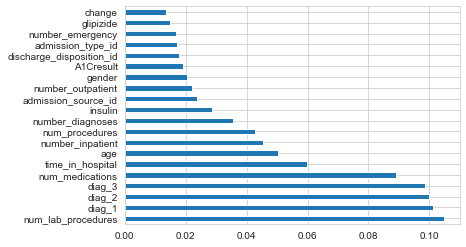

In [190]:
(pd.Series(mod.feature_importances_, index=x.columns)
   .nlargest(20)
   .plot(kind='barh')) 

# Conclusion


Six major features are found to have high impact on diabetes patient readmission: number of lab procedures,diag1,diag2,diag3, number of medications, time spent in hospital

The logistic regression classifier modeling achieves 0.69 accuracy and can be considered as the best for our dataset 

To correctly predict the readmission , hospitals should carefully examine the clinical data of patients and pay special attention to the above major features.

Some other features might be worth collecting, for example,family history.

This analytic method can be applied to different diseases other than diabetes.

In conclusion, ML could help healthcare providers to identify those patients who are prone to short-term readmission and might reduce the probability of readmission within 30 days by altering the risk factors.

                                 --------------THE END -----------------